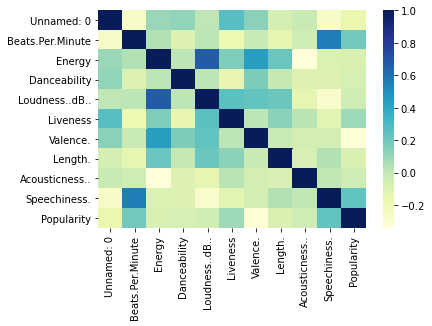

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read the data from the csv
df = pd.read_csv('top50.csv', encoding='ISO-8859-1')
df.head(10)
#the data rows and colomns
df.shape
#describtion of each atribute
df.describe()
df.values
#checked if there is any null data
df.isnull().sum()
#Feature selection
#Correlation matrix
music_corr = df.corr()
music_corr
sns.heatmap(music_corr, cmap = 'YlGnBu')
#dropped unrequired atributes
df = df.drop(['Artist.Name', 'Loudness..dB..','Energy','Acousticness..','Unnamed: 0','Danceability','Length.'], axis = 1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor #makes decisions via trees
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures #mapping into polynomial lines
from sklearn.pipeline import make_pipeline #two different model eki operation serially to schedule work


model1 = LinearRegression() ##
model2 = DecisionTreeRegressor(random_state=1) ##
model3 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()) ##

X = df[['Beats.Per.Minute', 'Valence.', 'Speechiness.']]
y = df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=6)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

predict_y1 = model1.predict(X_test)
predict_y2 = model2.predict(X_test)
predict_y3 = model3.predict(X_test)


LinearRegression---------> score: 0.09578864199860626 RMSE: 4.183961267854542
DecisionTreeRegression---> score: -0.13636363636363624 RMSE: 4.69041575982343
PolynomialRegression-----> score: 0.3685426251434527 RMSE: 3.4964288605980185


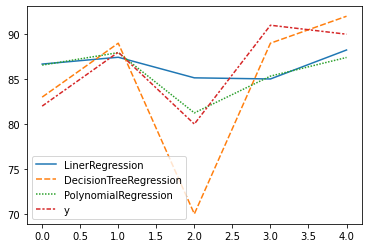

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
result = pd.DataFrame()
model1_RMSE = sqrt(mean_squared_error(y_test, predict_y1))
model2_RMSE = sqrt(mean_squared_error(y_test, predict_y2))
model3_RMSE = sqrt(mean_squared_error(y_test, predict_y3))

model1_score = model1.score(X_test,y_test)
model2_score = model2.score(X_test,y_test)
model3_score = model3.score(X_test,y_test)

sns.lineplot(data={'LinerRegression':predict_y1, 'DecisionTreeRegression':predict_y2,
                   'PolynomialRegression':predict_y3, 'y':y_test.values})

print('LinearRegression--------->', 'score:', model1_score, 'RMSE:', model1_RMSE)
print('DecisionTreeRegression--->', 'score:', model2_score, 'RMSE:', model2_RMSE)
print('PolynomialRegression----->', 'score:', model3_score, 'RMSE:', model3_RMSE)

